<a href="https://colab.research.google.com/github/bhouldridge/repertoire/blob/main/unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 4

Benjamin Houldriedge
August 25th 2020

##Problem Definition

Using unsupervised learning, determine attributes of a biography such as sentiment, and other similar people.

##Data Collection

###Installs

In [ ]:
!pip install Wikipedia
!python -m textblob.download_corpora

  Created wheel for Wikipedia: filename=wikipedia-1.4.0-cp36-none-any.whl size=11686 sha256=af2bea195bf717391a937d44a5debf1ad955dcd56f44839546e8f286f7ff72c4
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built Wikipedia
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


###imports

In [ ]:
import numpy as np
import pandas as pd
import textblob
import sklearn
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import random
import wikipedia

###Data Path

Data supplied by Cliff Lewis. It contains urls for biographical pages of 42786 individuals from dbpedia.org. 

In [ ]:
people_path = '/content/drive/My Drive/Exercises - Benjamin/Project 4/Copy of people_db.csv'

In [ ]:
people = pd.read_csv(people_path)

In [ ]:
people.head()

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...


In [ ]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42786 entries, 0 to 42785
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   URI     42786 non-null  object
 1   name    42786 non-null  object
 2   text    42786 non-null  object
dtypes: object(3)
memory usage: 1002.9+ KB


##Data Cleaning

The text column needs to be converted to textblob objects to be useful. 

In [ ]:
def convert_column_to_textblob(column):
  """Returns a list of text blob objects from the given column."""

  new_column = []
  for item in column:
    x = textblob.TextBlob(item)
    new_column.append(x)
  return new_column

In [ ]:
bios = pd.Series(convert_column_to_textblob(people['text']), index=people['name'])

##Exploratory Data Analysis

###Sentiment Analysis

In [ ]:
def score_polarity(column):
  """Returns a list of polarity scores"""

  scores = []
  for item in column:
    score = item.sentiment.polarity
    scores.append(score)
  return scores

In [ ]:
def score_subjectivity(column):
  """Returns a list of subjectivity scores"""

  scores = []
  for item in column:
    score = item.sentiment.subjectivity
    scores.append(score)
  return scores

In [ ]:
polarity_scores = pd.Series(score_polarity(bios), index=people['name'])

In [ ]:
subjectivity_scores = pd.Series(score_subjectivity(bios), index=people['name'])

###Visualise Polarity and Subjectivity

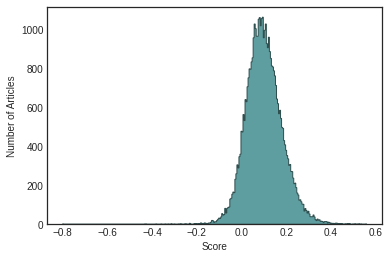

In [ ]:
plt.style.use('seaborn-white')
plt.xlabel('Score')
plt.ylabel('Number of Articles')
plt.hist(polarity_scores,
         bins=300,
         color='cadetblue',
         histtype='stepfilled',
         edgecolor='darkslategray');

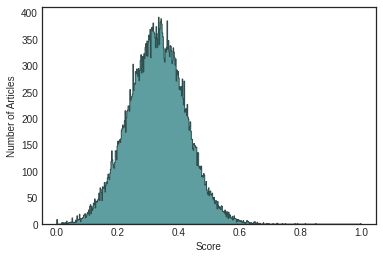

In [ ]:
plt.style.use('seaborn-white')
plt.xlabel('Score')
plt.ylabel('Number of Articles')
plt.hist(subjectivity_scores,
         bins=500,
         color='cadetblue',
         histtype='stepfilled',
         edgecolor='darkslategray',);

By the graphs we can see that most bios are slightly positive and mostly objective.

##Data Processing

###Closeness Mapping

Using the text column, produce a matrix with a vector describing the weights of each word in each biography. 

In [ ]:
vectorizer = sklearn.feature_extraction.text.CountVectorizer(stop_words='english')

In [ ]:
document_term_matrix = vectorizer.fit_transform(people['text'])

Produce a nearest neighbors object, and fit it to the document term matrix. 

In [ ]:
nn = NearestNeighbors(n_neighbors=11)

In [ ]:
nn.fit(document_term_matrix)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                 radius=1.0)

Select a random person from the data set.

In [ ]:
def select_person():
  """At random select a person from the list provided."""

  random_person_index = random.choice(people.index)
  random_person = people['name'][random_person_index]
  print( 'Your person is ' + random_person + '.')
  return random_person, random_person_index

Return the 10 closest people to the random person.

In [ ]:
def find_nearest_to(person):
  """Print the 10 closest people"""
  if type(person) == str:
    person_index = people[people['name'] == person].index[0]
  else:
    person_index = person
  
  closest_people = nn.kneighbors(document_term_matrix[person_index])[1]
  print(people.loc[closest_people[0],'name'][1:])
  return None

###Step 1

In [ ]:
def step1():
  """ake one person from the list as input and output the 10 other people who's 
  overview are "closest" to the person in a Natural Language Processing sense.
  Also output the sentiment of the overview."""

  person, index = select_person()
  find_nearest_to(index)
  return person

In [ ]:
random_person = step1()

Your person is Michael H. Watson.
16839                Paul Ramon Matia
6902                    James G. Carr
17744              James C. Dever III
13832                Gary Allen Feess
1679     William Harold Albritton III
29678                  Mike Shoemaker
7519                 Carol E. Jackson
6924                  D. Brock Hornby
36852                J. Curtis Joyner
33999         James Robertson (judge)
Name: name, dtype: object


Michael Harrison Watson (born 1956) is a United States District Judge of the United States District Court for the Southern District of Ohio.
This article has a polarity of 0.025000000000000005
This article has a sentiment of 0.26180555555555557


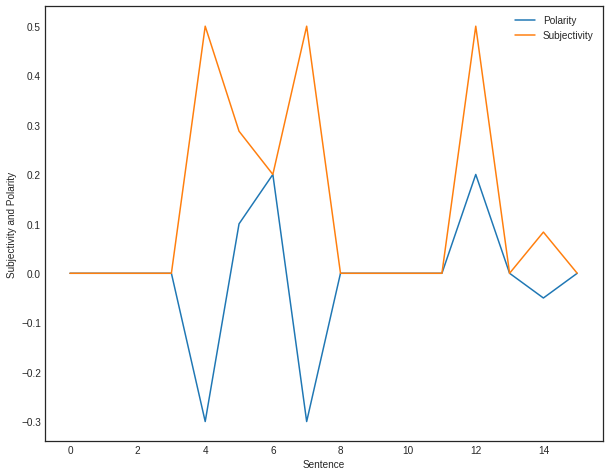

In [ ]:
step2('Michael H. Watson')

In [ ]:
wikipedia.summary('Michael H. Watson')

'Michael Harrison Watson (born 1956) is a United States District Judge of the United States District Court for the Southern District of Ohio.'

In [ ]:
wikipedia.summary('Paul Ramon Matia')

'Paul Ramon Matia (born 1937) is a former United States District Judge of the United States District Court for the Northern District of Ohio.'

We can see that often people of the same occupation or time period are closest to each other.

###Wikipikea Sentiment

Determin Sentiment of Artical

In [ ]:
def get_sentiment(page):
  """Print polarity and subjectivity of wiki page"""

  artical = page.content
  artical_blob = textblob.TextBlob(artical)
  print('This article has a polarity of ' + 
        str(artical_blob.sentiment.polarity))
  print('This article has a subjectivity of ' + 
        str(artical_blob.sentiment.subjectivity))
  return None

Determin Sentament over Article

In [ ]:
def get_sentiment_change(page):
  """Show a graph of the change in sentiment over the article."""
  
  sentences = page.content.split('.')
  sentences_blob = convert_column_to_textblob(sentences)
  sentence_polarity = score_polarity(sentences_blob)
  sentence_subjectivity = score_subjectivity(sentences_blob)
  x = range(len(sentences))

  plt.figure(figsize=(10,8))
  plt.plot(x, sentence_polarity)
  plt.plot(x, sentence_subjectivity)
  plt.legend(['Polarity', 'Subjectivity'])
  plt.ylabel('Subjectivity and Polarity')
  plt.xlabel('Sentence')

Get Wikipedia Summary

In [ ]:
def print_summary(person):
  """Print the wiki summary of the person."""

  print(wikipedia.summary(person))
  return None

###Step2

In [ ]:
def step2(person):
  """For that Wikipedia page determine the sentiment of the entire page.
  Determine any changes in sentiment throughout the article.
  Output a summary of the Wikipedia article."""

  print_summary(person)
  persons_page = wikipedia.page(person) 
  get_sentiment(persons_page)
  get_sentiment_change(persons_page)  

##Data Visulzation

In [ ]:
random_person = step1()

Your person is Flip Mark.
11134           Shirley Bonne
11164             Cal Bellini
21481          Barbara Steele
15642      Ron Foster (actor)
7732            Robert Mandan
31548           Robert Rusler
2082     Tim O'Connor (actor)
37233     Daniel Ryan (actor)
26703            John Ericson
7778                Anna-Lisa
Name: name, dtype: object


Philip Mark Goldberg (born December 22, 1948), better known by his stage name Flip Mark, is an American former child actor. He was primarily active in the 1960s.
Mark's first role was at the age of ten as "Flip Rhinelander" in the 1959 film The Journey, starring Yul Brynner and Deborah Kerr. That same year, he appeared as Robbie Adams in "Another Day Another Dollar" of the NBC anthology series Alcoa Theatre. In 1960, he played 11-year-old George MacKay in the Doris Day and David Niven film, Please Don't Eat the Daisies. In the 1959-1960, television season, Mark appeared five times with Jon Provost as play-mate "Flip Rogers" on the CBS series, Lassie in episodes entitled "The Whopper", "Alias Jack and Joe", "Champ", "The Alligator", and "The Wallaby".In 1960, Mark appeared as "Junior" in the episode "My Brother, the Hero" of the NBC sitcom, The Tab Hunter Show.. In 1961, Mark appeared as "Dennis" in the episode "A Friend to Man" of the syndicated television series The Brothers Brannagan

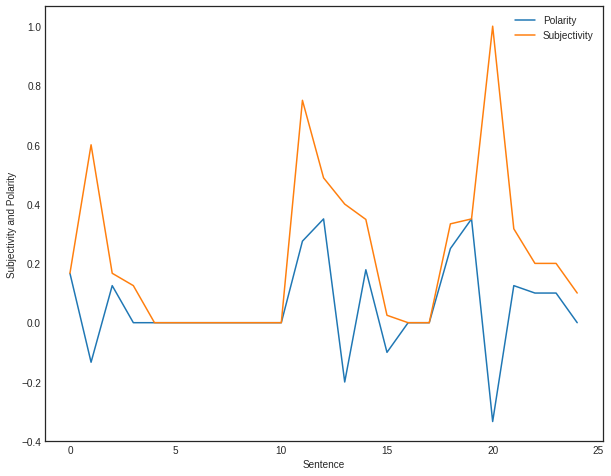

In [ ]:
step2(random_person)

Naomi Replansky (born May 23, 1918) is an American poet.
This article has a polarity of 0.047456709956709954
This article has a subjectivity of 0.4556096681096681


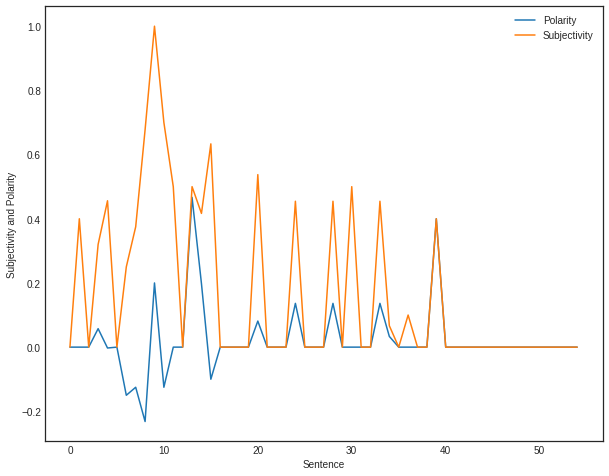

In [ ]:
step2('Naomi Replansky')

William Henry Gates III  (born October 28, 1955) is an American business magnate, software developer, investor, and philanthropist. He is best known as the co-founder of Microsoft Corporation. During his career at Microsoft, Gates held the positions of chairman, chief executive officer (CEO), president and chief software architect, while also being the largest individual shareholder until May 2014. He is one of the best-known entrepreneurs and pioneers of the microcomputer revolution of the 1970s and 1980s.
Born and raised in Seattle, Washington, Gates co-founded Microsoft with childhood friend Paul Allen in 1975, in Albuquerque, New Mexico; it went on to become the world's largest personal computer software company. Gates led the company as chairman and CEO until stepping down as CEO in January 2000, but he remained chairman and became chief software architect. During the late 1990s, Gates had been criticized for his business tactics, which have been considered anti-competitive. This 

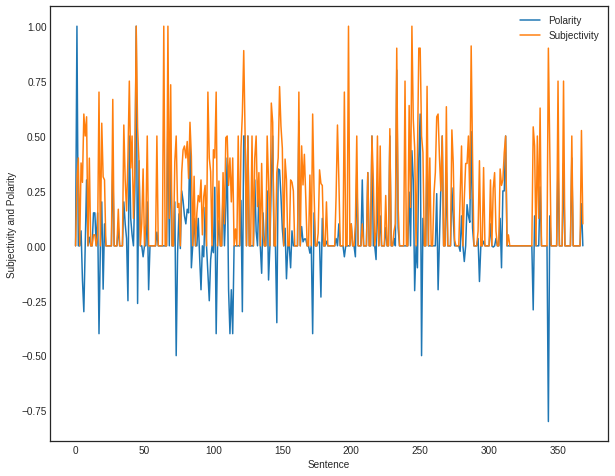

In [ ]:
step2('Bill Gates')

Most Wikipedia articles are not long enough to determine if a change in sentiment can hint at multiple authors. The wikipedia articles that are long show a consistently random sentiment over the article, making it impossible to determine multiple authors with any confidence.

###Presentation Demonstration

Find Index of chosen person, (Roddy Piper)

In [ ]:
people[people['name']=='Roddy Piper'].index[0]

32819

Find nearest people by index.

In [ ]:
find_nearest_to(people[people['name']=='Roddy Piper'].index[0])

15845       Lita (wrestler)
2037          William Regal
18432          Jake Roberts
19757      Sable (wrestler)
21038         Trish Stratus
35633        Marie Brassard
35976       Rocky Dzidzornu
3689           Ralph McTell
28802        The Undertaker
32308    Julio Palau Lozano
Name: name, dtype: object


Find nearest people by name.

In [ ]:
find_nearest_to('Roddy Piper')

15845       Lita (wrestler)
2037          William Regal
18432          Jake Roberts
19757      Sable (wrestler)
21038         Trish Stratus
35633        Marie Brassard
35976       Rocky Dzidzornu
3689           Ralph McTell
28802        The Undertaker
32308    Julio Palau Lozano
Name: name, dtype: object


Find return summary and sentament over time for chosen perosn. 

Roderick George Toombs (April 17, 1954 – July 31, 2015) was a Canadian professional wrestler, amateur wrestler, amateur boxer, and actor, better known by his ring name "Rowdy" Roddy Piper.
In professional wrestling, Piper was best known to international audiences for his work with the World Wrestling Federation (WWF, now WWE) and World Championship Wrestling (WCW) between 1984 and 2000. Although he was Canadian, because of his Scottish heritage he was billed as coming from Glasgow and was known for his signature kilt and bagpipe entrance music. Piper earned the nicknames "Rowdy" and "Hot Rod" by displaying his trademark "Scottish" rage, spontaneity, and quick wit. According to The Daily Telegraph, he is "considered by many to be the greatest 'heel' (or villain) wrestler ever".One of wrestling's most recognizable stars, Piper headlined multiple PPV events, including the WWF and WCW's respective premier annual events, WrestleMania and Starrcade. He accumulated 34 championships and hosted

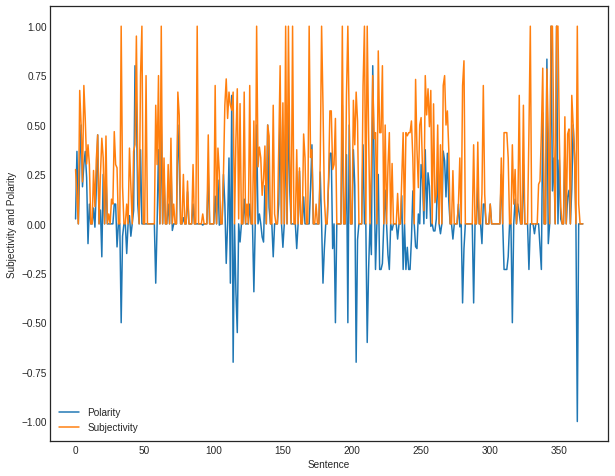

In [ ]:
step2('Roddy Piper')

##For Fun

###Wiki Game

Posible difforetn wikiapi  https://pypi.org/project/Wikipedia-API/

In [ ]:
wiki_game = wikipedia.WikipediaPage('Wikipedia:Wiki Game')
wiki_game.content

'The Wiki Game, also known as the Wikipedia race, is a hypertextual game designed to work specifically with Wikipedia. It requires only a computer, Internet access, a web browser and (optionally) a time-keeping device to play.\n\n\n== Objective ==\nPlayers (one or more) start on the same randomly selected article, and must navigate to another pre-selected target article, solely by clicking links within each article. The goal is to arrive at the target article in the fewest clicks (articles), or the least time. The single-player Wiki Game, known as Wikirace, Wikispeedia, WikiLadders, WikiClick, or WikiWhack, involves reducing one\'s previous time or number of clicks.\n\n\n== Setup ==\nUse the random article link in the navigation box to or have someone else (see procedure 1 for more information) select two random articles. One is the start article and the other is the target article.\nNavigate all players\' browsers to the start article.\nPurge the history folder of the web browsers.\n\

In [ ]:
def play_wiki_game(start_page, target_page='Bill Gates' ):
  """Produced a path through the links of Wikipedia from input person to Hitler."""

  current_page = start_page
  path_map = [start_page]
  while current_page != target_page:
    print(current_page)
    current_page = select_branch(current_page, target_page, path_map)
    path_map.append(current_page)
    continue
  print(path_map)
  print('You Win!')
  return None

In [ ]:
def select_branch(current_page, target_page, path_map):
  """Return the title of the next page"""

  root_page = wikipedia.page(current_page)
  branch_list = root_page.links

  if target_page in branch_list:
    return target_page

  lowest_branch = find_lowest_branch(branch_list, target_page)

  if lowest_branch not in path_map:
    return lowest_branch

  else:
    while lowest_branch in path_map:
      print('Caught loop ' + str(lowest_branch))
      branch_list.remove(lowest_branch)
      lowest_branch = find_lowest_branch(branch_list, target_page)
      continue

    return lowest_branch

In [ ]:
def find_lowest_branch(branch_list, target_page):
  """Return the title of the page closest to the target"""

  branch_summaries = get_summaries(branch_list)
  branch_summaries.append(wikipedia.summary(target_page))
  #target_summary = wikipedia.summary(target_page)
  
  branch_vectorizer = sklearn.feature_extraction.text.CountVectorizer(
      stop_words='english')
  #target_vectorizer = sklearn.feature_extraction.text.CountVectorizer(
      #stop_words='english')

  branch_token_count_matrix = branch_vectorizer.fit_transform(branch_summaries)
  #target_token_count_matrix = target_vectorizer.fit_transform([target_summary])

  nn = NearestNeighbors(n_neighbors=1)
  nn.fit(branch_token_count_matrix[:-1])
  
  lowest_branch_index = nn.kneighbors(branch_token_count_matrix[-1])[1]
  return branch_list[lowest_branch_index[0][0]]

In [ ]:
def get_summaries(branch_list):
  """Return a list with the summaries form for every valid link."""

  branch_summaries = []
  for branch in branch_list:
    if '(disambiguation)' in branch:
      branch_summaries.append('Skip')
      continue

    elif wikipedia.suggest(branch) == None:
      branch_summaries.append('Skip')
      continue

    else:
      branch_summaries.append(wikipedia.summary(wikipedia.suggest(branch)[0]))
      continue

  return branch_summaries

In [ ]:
play_wiki_game('Alvin M. Weinberg', 'Albuquerque, New Mexico')

Alvin M. Weinberg
509th Composite Group
100th Air Refueling Wing
100th Air Refueling Squadron
Caught loop 100th Air Refueling Wing
100th Bombardment Wing
Caught loop 100th Air Refueling Squadron
100th Bomb Group Memorial Museum
Airfield
Abbeyshrule Aerodrome
Abbeyshrule
Abbeylara
Abbeylara GFC
Caught loop Abbeylara
All-Ireland Senior Club Football Championship
1970–71 All-Ireland Senior Club Football Championship
Caught loop 1970–71 All-Ireland Senior Club Football Championship
1971–72 All-Ireland Senior Club Football Championship
Caught loop 1970–71 All-Ireland Senior Club Football Championship
Caught loop 1971–72 All-Ireland Senior Club Football Championship
1972–73 All-Ireland Senior Club Football Championship
Caught loop 1970–71 All-Ireland Senior Club Football Championship
Caught loop 1971–72 All-Ireland Senior Club Football Championship
Caught loop 1972–73 All-Ireland Senior Club Football Championship
1973–74 All-Ireland Senior Club Football Championship
Caught loop 1970–71 All-I

PageError: ignored